In [1]:
from PIL import Image
import numpy as np
import os

In [2]:
img = Image.open(os.path.join("data", "img_cat.jpeg"))

In [3]:
img.size

(1185, 1481)

In [4]:
I = np.array(img)

In [5]:
import matplotlib.pyplot as plt

In [6]:
I.shape

(1481, 1185, 3)

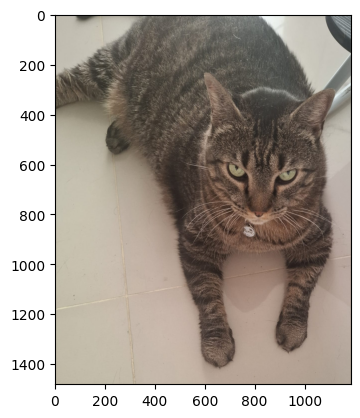

In [7]:
plt.imshow(I)   

In [9]:
I[:,:,0]

array([[190, 190, 190, ..., 115, 106, 119],
       [190, 190, 190, ..., 134, 130, 120],
       [190, 190, 190, ..., 147, 150, 127],
       ...,
       [190, 190, 190, ..., 177, 177, 158],
       [190, 190, 190, ..., 177, 177, 158],
       [190, 189, 189, ..., 177, 175, 157]], dtype=uint8)

In [10]:
I[:,:,0] = 0

In [11]:
I[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

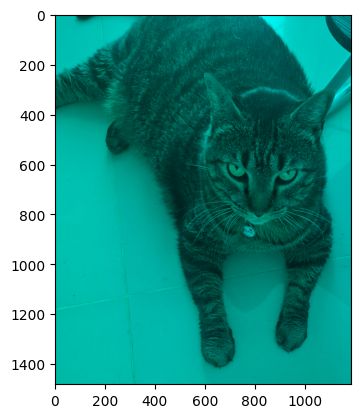

In [12]:
plt.imshow(I)

In [13]:
I[:,:,2] = 0

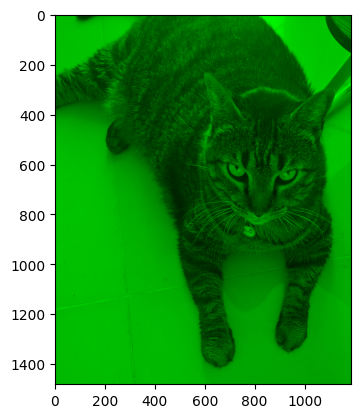

In [14]:
plt.imshow(I)

In [25]:
Ig = I[:,:,1]

In [22]:
Ig.shape

(1481, 1185)

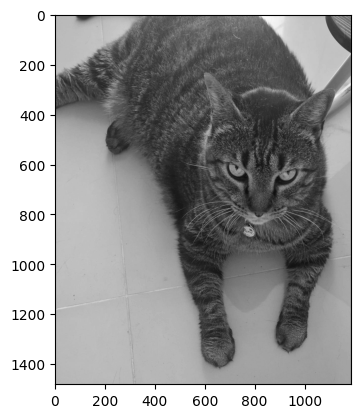

In [17]:
plt.imshow(Ig, cmap='gray')

(array([  8651., 166905., 316698., 256498., 140855., 116306., 316974.,
        421672.,   5996.,   4430.]),
 array([ 11. ,  35.3,  59.6,  83.9, 108.2, 132.5, 156.8, 181.1, 205.4,
        229.7, 254. ]),
 <BarContainer object of 10 artists>)

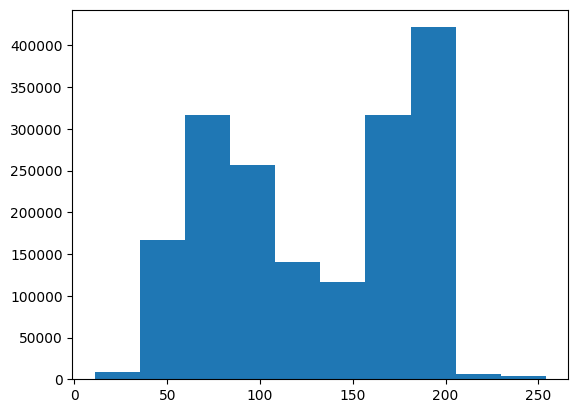

In [24]:
Ig = Ig.flatten()
plt.hist(Ig)

In [26]:
Ig = (np.maximum(Ig.astype(np.float32)-50, 0)).astype(np.uint8)

In [28]:
Igflat = Ig.flatten()

(array([312055., 268778., 188977., 115114.,  91900., 233125., 421023.,
        117351.,   3090.,   3572.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

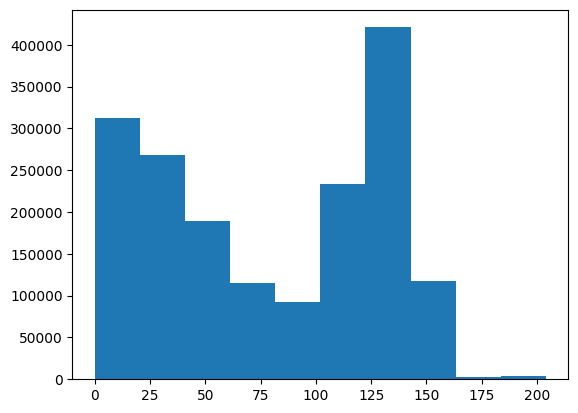

In [30]:
plt.hist(Igflat)

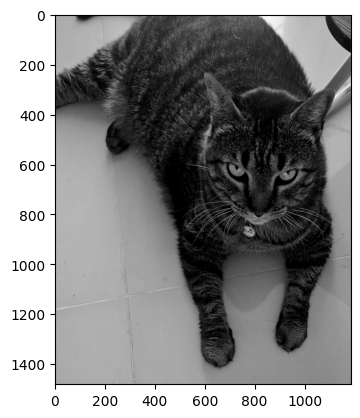

In [31]:
plt.imshow(Ig, cmap='gray')

In [35]:
Ig[:,800:820] = 255

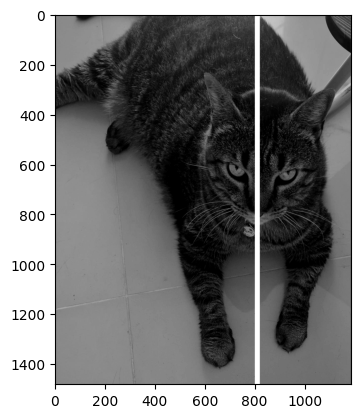

In [36]:
plt.imshow(Ig, cmap = 'gray')

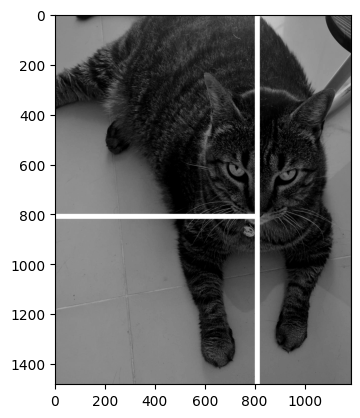

In [37]:
Ig[800:820,:800] = 255
plt.imshow(Ig,cmap='gray')

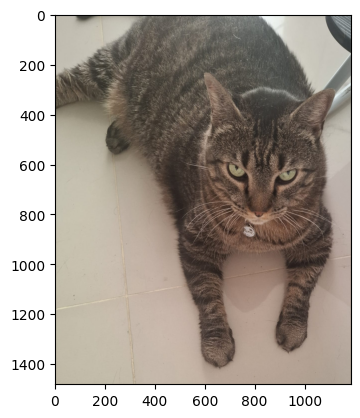

In [39]:
I = np.array(img)
plt.imshow(I)

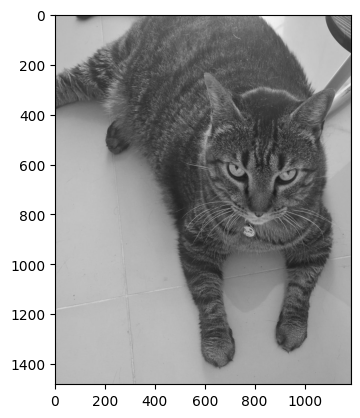

In [45]:
Ir = I[:,:,0]
Ig = I[:,:,1]
Ib = I[:,:,2]
Iprom = ((0.299)*Ir+(0.587)*Ig+(0.114)*Ib).astype(np.uint8)

Itot = np.stack([Iprom, Iprom, Iprom], axis=2)

plt.imshow(Itot)
